Datos iniciales
   Región        Mes                   Categoría  \
0  Oeste  Noviembre  Juguetes y entretenimiento   
1  Norte       Mayo  Juguetes y entretenimiento   
2   Este  Diciembre         Alimentos y bebidas   
3   Este    Febrero       Electrónica y gadgets   
4  Norte       Mayo           Ropa y accesorios   

                                       Producto  Precio unitario  Ventas  \
0  Libros infantiles bilingües (español-inglés)           117.41    2006   
1  Libros infantiles bilingües (español-inglés)           486.95    2650   
2         Mermelada de mango con chile habanero           388.74     623   
3            Audífonos con cancelación de ruido           433.01    3570   
4           Camisetas con estampados regionales           436.31    2099   

   Total vendido  
0      235524.46  
1     1290417.50  
2      242185.02  
3     1545845.70  
4      915814.69  
Se muestra el total de productos vendidos según la región
Región                                      Pro

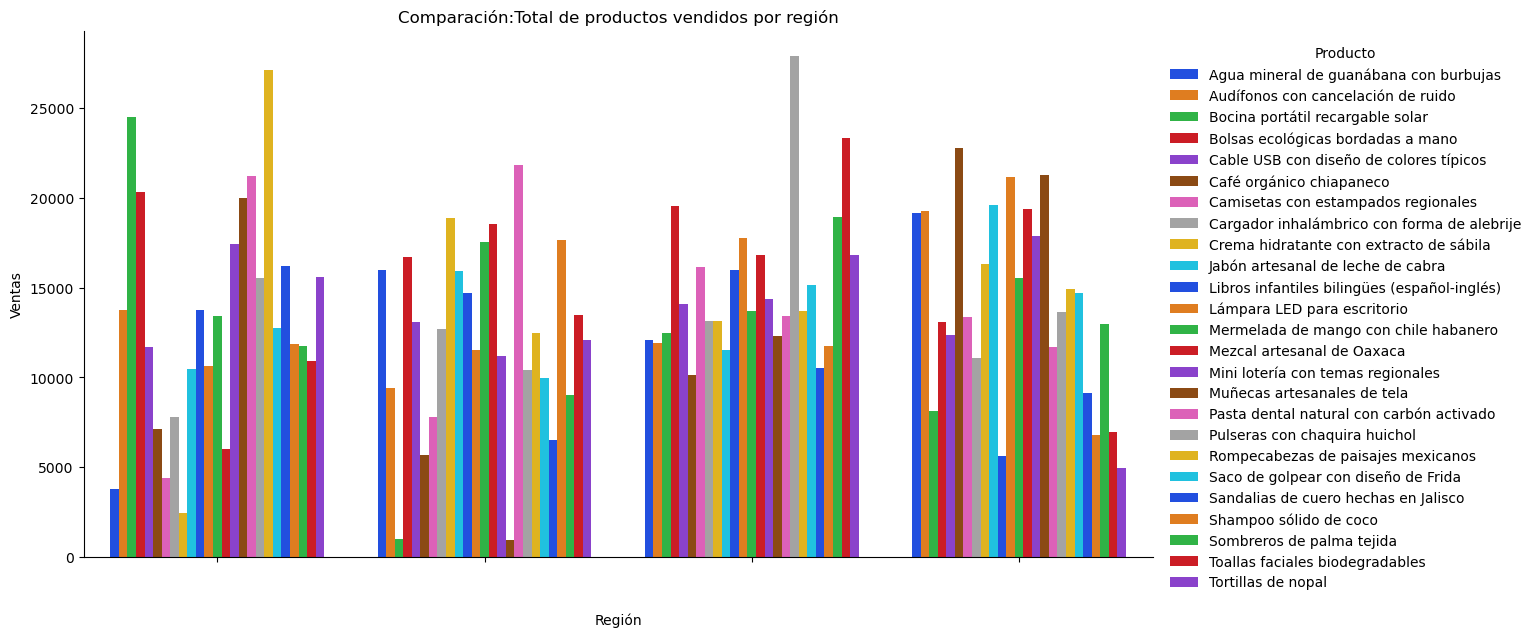

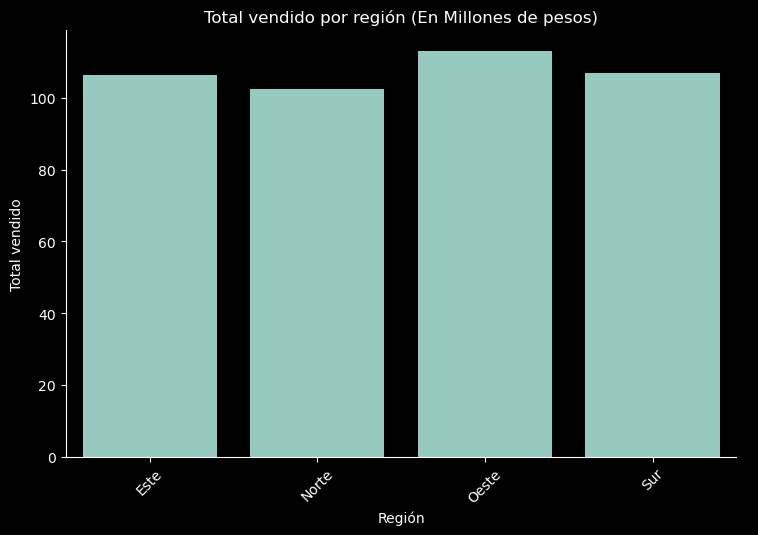

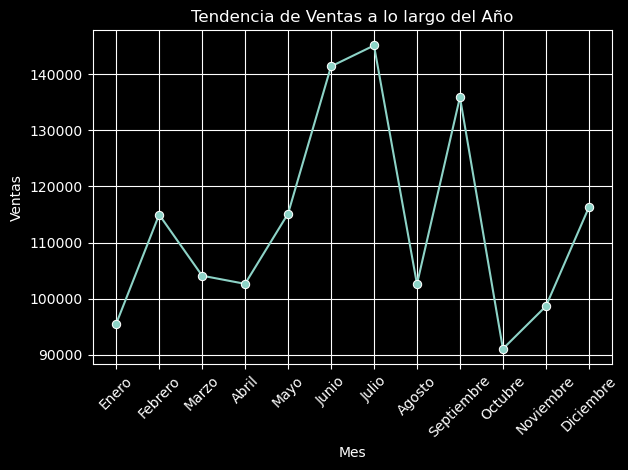

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/analisis_ventas.csv')
print("Datos iniciales\n", df.head())

# PRODUCTOS MÁS VENDIDOS EN CADA REGIÓN
prod_reg = pd.pivot_table(df, values='Ventas', index='Producto',
                          columns='Región', aggfunc='sum').reset_index()
print(f"Se muestra el total de productos vendidos según la región\n{prod_reg}")

# ENCONTRAR LOS PRODUCTOS MÁS VENDIDOS POR REGIÓN
este = prod_reg.loc[prod_reg['Este'].idxmax(), ['Producto', 'Este']]
oeste = prod_reg.loc[prod_reg['Oeste'].idxmax(), ['Producto', 'Oeste']]
norte = prod_reg.loc[prod_reg['Norte'].idxmax(), ['Producto', 'Norte']]
sur = prod_reg.loc[prod_reg['Sur'].idxmax(), ['Producto', 'Sur']]
print(
    f"De acuerdo a las ventas, los productos más vendidos por región son:\n{este}\n\n{oeste}\n\n{norte}\n\n{sur}")

# OBTENER LA TABLA DE MESES CON MAYOR VENTA
reg_ventas = pd.pivot_table(
    df, values='Total vendido', aggfunc='sum', index='Región').reset_index()
reg_ventas['Total vendido'] = reg_ventas['Total vendido'].apply(
    lambda x: f"${x/1000000} M")
reg_ventas = reg_ventas.sort_values(by='Total vendido', ascending=True)
print(
    f"\n\nDe acuerdo a la región, las ventas se muestran como sigue:\n{reg_ventas}")

# DISTRIBUCIÓN DE VENTAS DE ACUERDO A LOS MESES
venta_mes = pd.pivot_table(
    df, values='Ventas', aggfunc='sum', index='Mes').reset_index()
# Ordenar los meses según la lista dada
orden_mes = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
             'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Convierte 'Mes' a categoría ordenada solo para los valores presentes
venta_mes['Mes'] = pd.Categorical(
    venta_mes['Mes'], categories=orden_mes, ordered=True)
# Luego se ordena
venta_mes = venta_mes.sort_values('Mes').dropna()
print(venta_mes)

# GRÁFICAS CON SEABORN
# Productos x Región
# Lo transformamos a formato largo (long format)
df_long = prod_reg.melt(
    id_vars='Producto', var_name='Región', value_name='Ventas')
# Gráfica 1
sns.catplot(data=df_long, x='Región', y='Ventas', hue='Producto',
            kind='bar', height=6, aspect=2, palette='bright')
plt.style.use('dark_background')
plt.title('Comparación:Total de productos vendidos por región')
plt.xticks(rotation=90, color='white')
plt.show()

# Ventas x Región
ven_reg = pd.pivot_table(df, values='Total vendido',
                         aggfunc='sum', index='Región').reset_index()
ven_reg['Total vendido'] = ven_reg['Total vendido'].apply(lambda x: x/1000000)
sns.catplot(data=ven_reg, x='Región', y='Total vendido',
            kind='bar', height=5, aspect=1.5)
plt.title('Total vendido por región (En Millones de pesos)')
plt.xticks(rotation=45)
plt.show()

# ventas por mes
sns.lineplot(data=venta_mes, x='Mes', y='Ventas', marker='o')
plt.title('Tendencia de Ventas a lo largo del Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df.to_csv("analisis_ventas.csv", index=False)